## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:

- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:

- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:

- Este mismo notebook con las respuetas

### Evaluación

- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización

- Convocatoria 1 - 31/05/2024 - 01/06/2024


#### Descripción

El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:

- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire


In [210]:
# classic DS libs
import pandas as pd
import numpy as np

# visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Avoid annoying warning for deprecations ...
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

## 01

Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame


In [211]:
# open csv using pandas
path_to_csv = "./valencia_pollution_dataset.csv"
df = pd.read_csv(path_to_csv)

# display first 5 rows
df.head()

,objectid,nombre,direccion,tipozona,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,10,71.0,0.7,8.0,3.0,2024-05-24T20:20:06+00:00,Razonablemente Buena
1,28,Viveros,Jardines de Viveros,Urbana,Fondo,0.0,5,88.0,NaN,NaN,NaN,2024-05-24T20:20:08+00:00,Razonablemente Buena
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,Tráfico,NaN,24,NaN,NaN,20.0,11.0,2024-05-24T20:20:11+00:00,Razonablemente Buena
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2024-05-24T20:20:12+00:00,Razonablemente Buena
4,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,82.0,0.1,9.0,6.0,2024-05-24T20:20:04+00:00,Razonablemente Buena


In [212]:
# Display info of DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   objectid           396 non-null    int64  
 1   nombre             396 non-null    object 
 2   direccion          396 non-null    object 
 3   tipozona           396 non-null    object 
 4   tipoemision        396 non-null    object 
 5   so2                216 non-null    float64
 6   no2                396 non-null    int64  
 7   o3                 216 non-null    float64
 8   co                 108 non-null    float64
 9   pm10               288 non-null    float64
 10  pm25               288 non-null    float64
 11  fecha_carga        396 non-null    object 
 12  calidad_ambiental  396 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 40.3+ KB


In [213]:
# Take a look at the description of our data
df.describe()

,objectid,so2,no2,o3,co,pm10,pm25
count,396.000000,216.000000,396.000000,216.0000,108.000000,288.000000,288.000000
mean,208.818182,1.449074,8.921717,71.0000,0.366667,14.687500,8.031250
std,264.784847,1.400066,6.453058,13.0662,0.250607,6.258061,3.224859
min,22.000000,0.000000,0.000000,36.0000,0.100000,6.000000,2.000000
25%,24.000000,0.000000,4.000000,63.0000,0.100000,7.000000,5.750000
50%,27.000000,1.000000,7.000000,75.0000,0.300000,16.500000,8.500000
75%,431.000000,2.000000,12.000000,81.0000,0.700000,19.000000,10.000000
max,829.000000,5.000000,39.000000,90.0000,0.700000,25.000000,14.000000


In [214]:
# Check for duplication
df.nunique()

objectid              11
nombre                11
direccion             11
tipozona               2
tipoemision            2
so2                    6
no2                   31
o3                    51
co                     3
pm10                  15
pm25                  13
fecha_carga          315
calidad_ambiental      2
dtype: int64

In [215]:
# DF cleaning

# Use proper type for dates
df["fecha_carga"] = pd.to_datetime(df["fecha_carga"])

# Use category field for restrictive fields
df["calidad_ambiental"] = df["calidad_ambiental"].astype("category")
df["tipozona"] = df["tipozona"].astype("category")
df["tipoemision"] = df["calidad_ambiental"].astype("category")

## 02

- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono


In [216]:
# using date formatting to make dates more readable
DATE_FORMAT = "%d %b %Y"

# get min and max date using min() and max()
min_date = df["fecha_carga"].min()
max_date = df["fecha_carga"].max()

# Display output
print(
    f"Rango temporal del dataset: desde {min_date.strftime(DATE_FORMAT)} hasta {max_date.strftime(DATE_FORMAT)}"
)

Rango temporal del dataset: desde 24 May 2024 hasta 26 May 2024


In [217]:
# First we get the rows that have measures of co and then we simply count them
stations_co_amount = df["co"].count()

# Display output
print(f"Cantidad de estaciones que reportan mediciones de CO: {stations_co_amount}")

Cantidad de estaciones que reportan mediciones de CO: 108


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono


In [218]:
# Group measures by terminal and the maximum value of CO
max_co_by_terminal = df.groupby(by="objectid")["co"].agg("max")
max_co_by_terminal.dropna(inplace=True)

# Get the id based on the max value
max_co_terminal = max_co_by_terminal.idxmax()
print(f"El número de estación con la medición mas alta es: {max_co_terminal}")

El número de estación con la medición mas alta es: 26


## 04

Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior


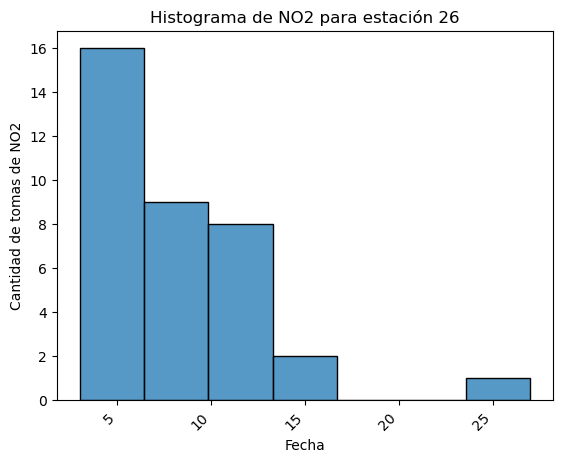

In [219]:
# Filter data using mask
terminal_mask = df["objectid"] == max_co_terminal

# Use the mask
data = df[terminal_mask]

# Use histplot to show Histogram
sns.histplot(data=data, x="no2")

# Set proper labelling
plt.xticks(rotation=45, ha="right")
plt.title(f"Histograma de NO2 para estación {max_co_terminal}")
plt.ylabel("Cantidad de tomas de NO2")
plt.xlabel("Fecha")

# Show graph
plt.show()

## 05

Realizar gráfica con la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.


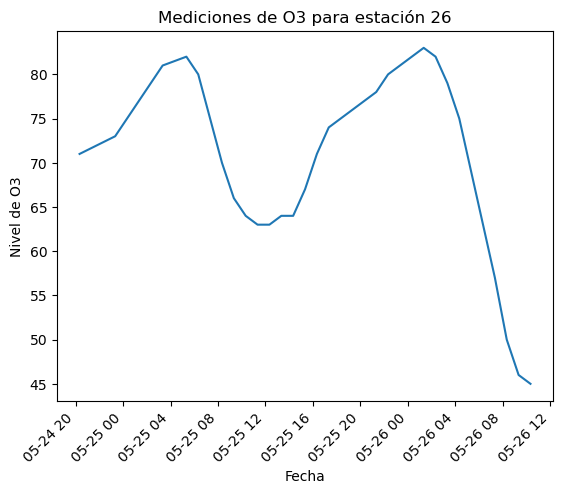

In [220]:
# Filter data using mask
terminal_mask = df["objectid"] == max_co_terminal

# Use the mask and select fields
data = df[terminal_mask]

# Use lineplot to show measurement over the time
sns.lineplot(data=data, x="fecha_carga", y="o3")

# Set appropiate labelling
plt.xticks(rotation=45, ha="right")
plt.title(f"Mediciones de O3 para estación {max_co_terminal}")
plt.ylabel("Nivel de O3")
plt.xlabel("Fecha")

# Show graph
plt.show()